In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense

Using TensorFlow backend.


In [9]:
train = pd.read_csv("./mod_Data/train_remove_ver1.csv")
val_x = pd.read_csv("./mod_Data/val_x_remove_ver1.csv")
val_y = pd.read_csv("./mod_Data/val_y_remove_ver1.csv")
test_x = pd.read_csv("./mod_Data/test_x_remove_ver1.csv")

In [11]:
train_x = train.drop('ID',axis=1)

In [12]:
train_x.shape

(113378, 20)

In [77]:
input_layer_all = Input(shape=(20, ))

encoded = Dense(16, activation='tanh')(input_layer_all)
encoded = Dense(11, activation='tanh')(encoded)
encoded_all = Dense(8,activation='tanh')(encoded)

decoded = Dense(11, activation='tanh')(encoded_all)
decoded = Dense(116, activation='tanh')(decoded)
decoded_all = Dense(20,activation='sigmoid')(decoded)

autoencoder_all = Model(input_layer_all,decoded_all)

autoencoder_all.compile(optimizer='adam',loss='mean_squared_error')
autoencoder_all.fit(train_x, train_x, epochs = 100, batch_size=128, validation_data=(train_x,train_x))

Train on 113378 samples, validate on 113378 samples
Epoch 1/100
113378/113378 [==============================] - 6s 56us/step - loss: 0.8613 - val_loss: 0.8112
Epoch 2/100
113378/113378 [==============================] - 5s 47us/step - loss: 0.7989 - val_loss: 0.7863
Epoch 3/100
113378/113378 [==============================] - 5s 47us/step - loss: 0.7762 - val_loss: 0.7677
Epoch 4/100
113378/113378 [==============================] - 5s 47us/step - loss: 0.7619 - val_loss: 0.7569
Epoch 5/100
113378/113378 [==============================] - 5s 48us/step - loss: 0.7530 - val_loss: 0.7483
Epoch 6/100
113378/113378 [==============================] - 5s 48us/step - loss: 0.7425 - val_loss: 0.7375
Epoch 7/100
113378/113378 [==============================] - 5s 48us/step - loss: 0.7346 - val_loss: 0.7315
Epoch 8/100
113378/113378 [==============================] - 5s 47us/step - loss: 0.7294 - val_loss: 0.7270
Epoch 9/100
113378/113378 [==============================] - 6s 50us/step - loss: 0.

In [78]:
encoder_all = Model(input_layer_all,encoded)
enc_all = encoder_all.predict(val_x)

In [119]:
df = pd.DataFrame(enc_all)
df['Class'] = val_y
df.head()

,0,1,2,3,4,5,6,7,8,9,10,Class
0,-0.391355,0.241835,0.265895,-0.322901,0.495826,-0.796939,0.673940,0.988235,-0.155295,0.510378,0.611698,0.0
1,-0.748582,0.428293,0.676031,-0.435987,0.495705,-0.886609,0.700009,0.977805,0.304188,0.464384,0.499934,0.0
2,-0.698701,0.287613,0.994320,-0.675188,0.594313,-0.846769,0.680454,0.658388,0.657213,0.373210,0.356308,0.0
3,-0.428512,0.373311,0.931403,-0.098747,0.596369,-0.866831,0.481452,0.493878,-0.074881,0.453783,0.986063,0.0
4,-0.632569,0.303549,0.445176,-0.664777,0.653080,-0.553664,0.637119,0.735046,0.213499,0.471488,0.399326,0.0


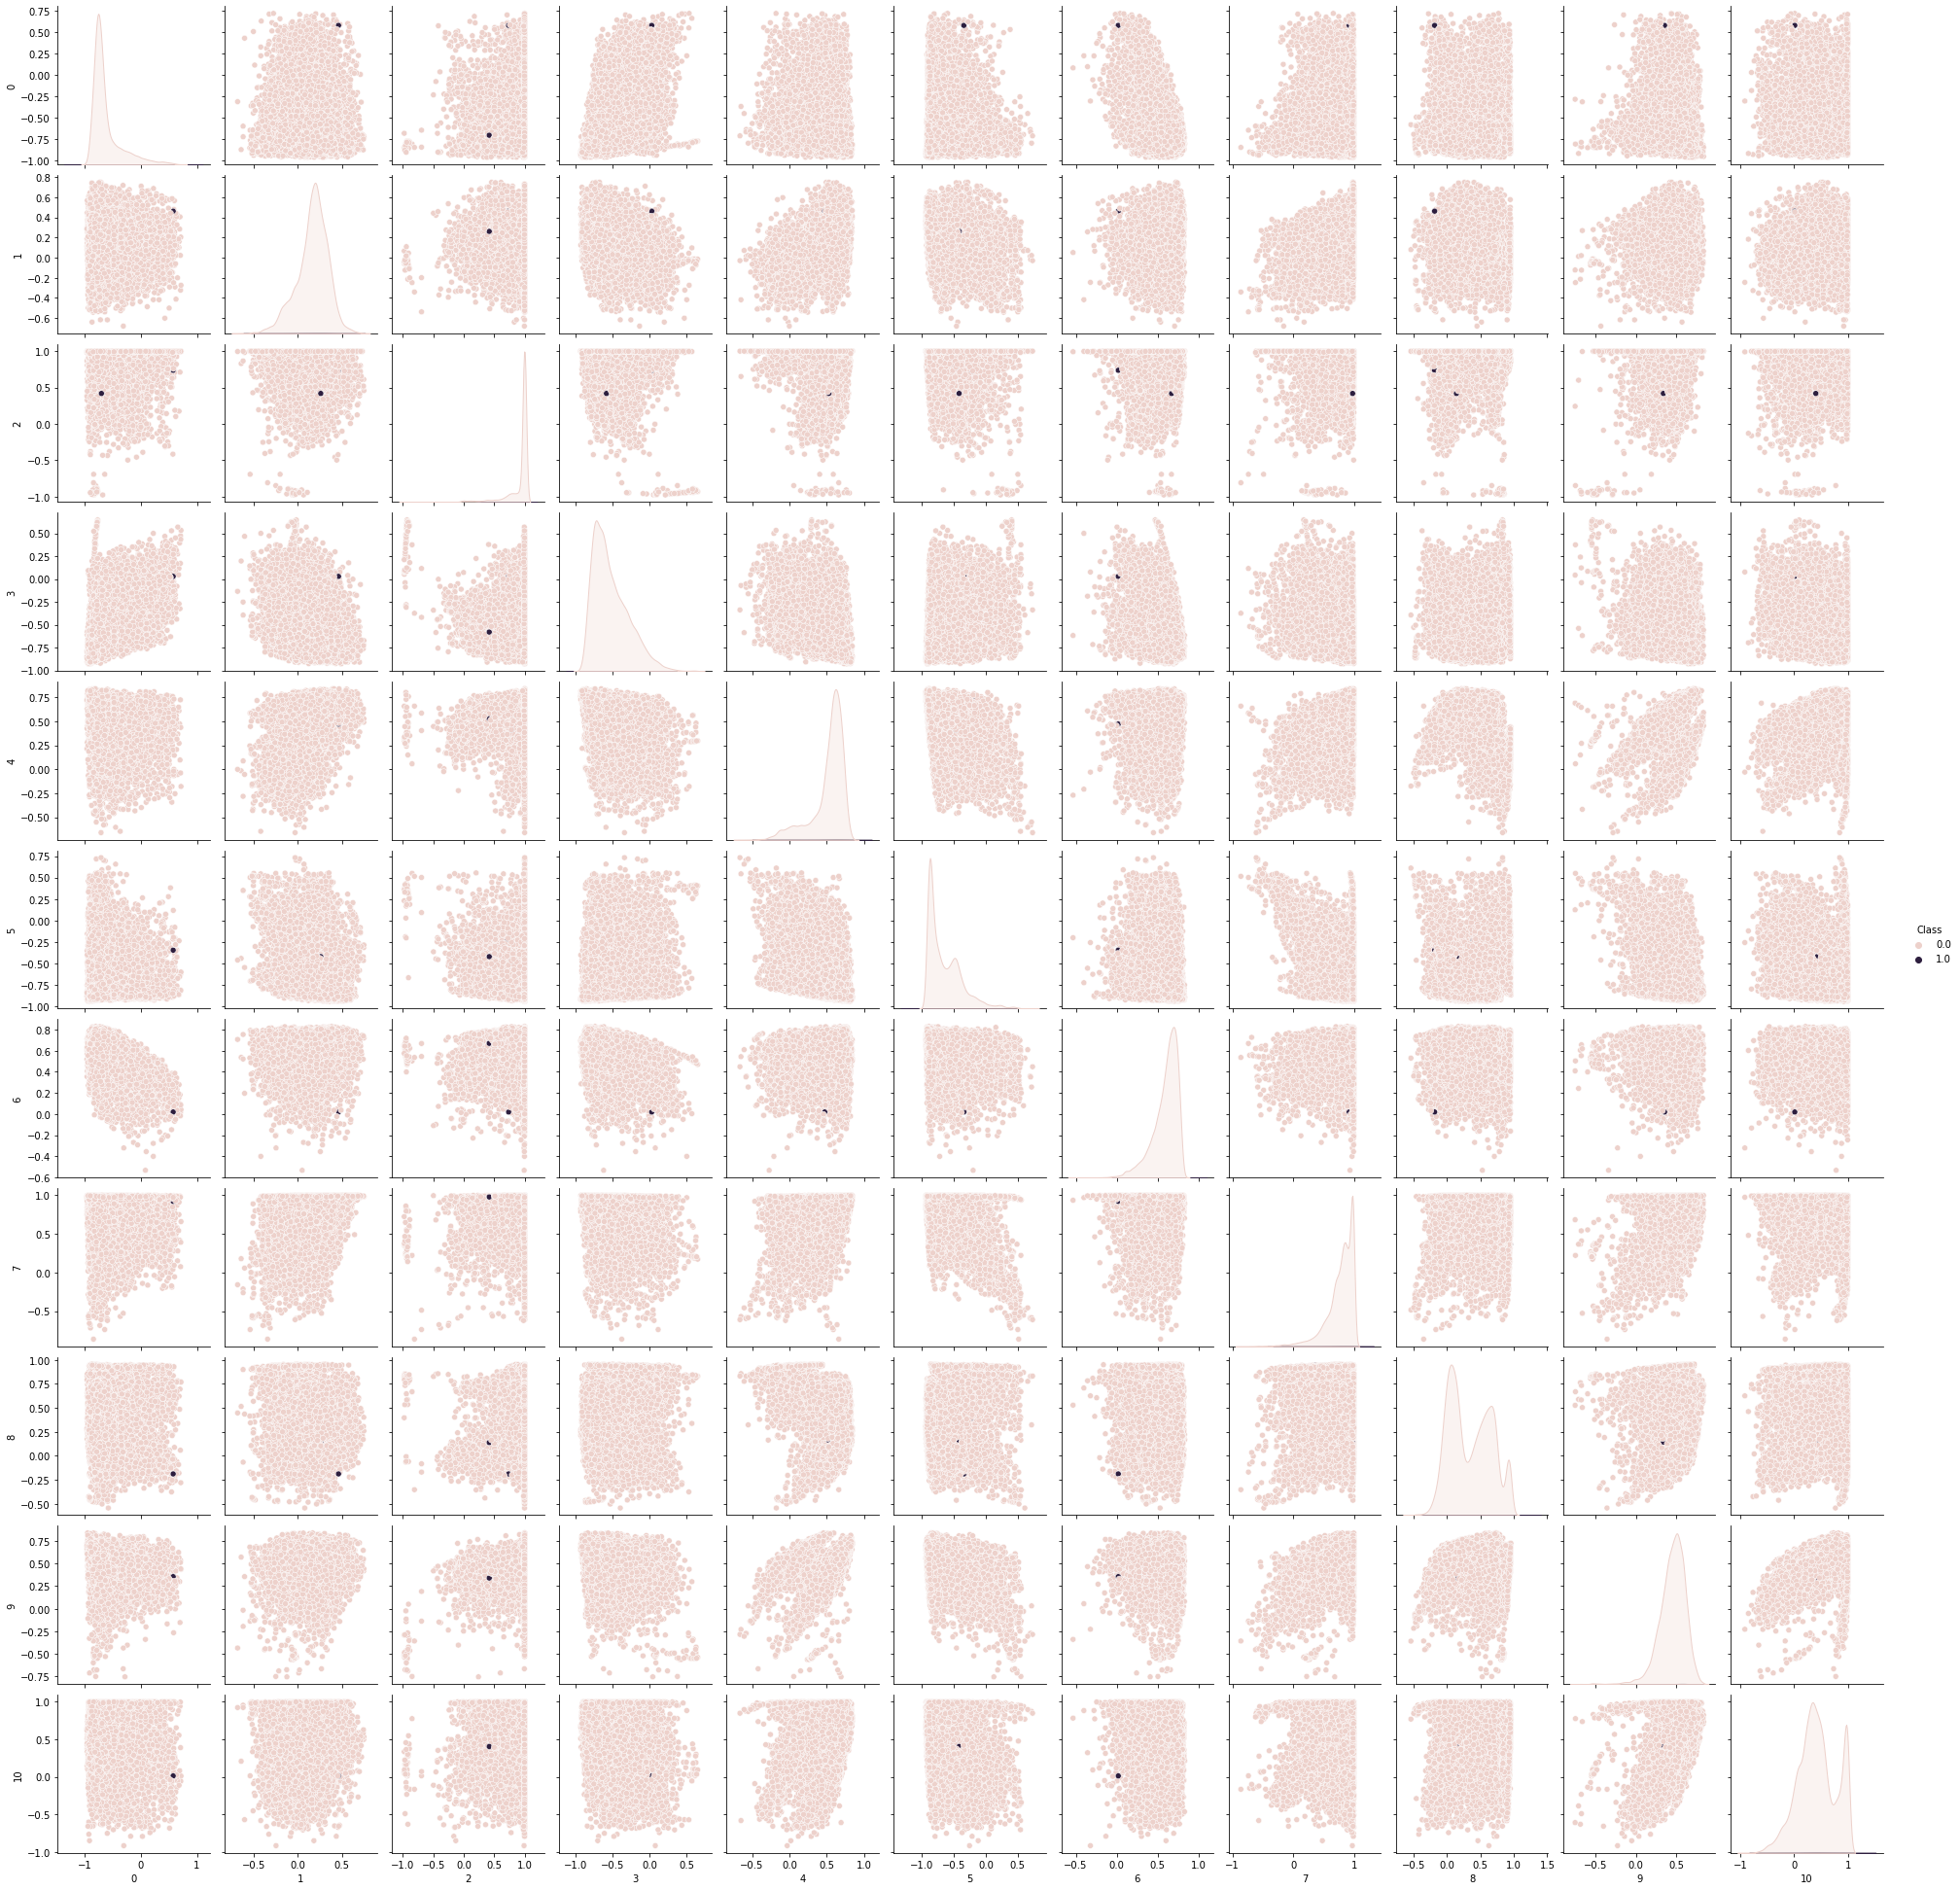

In [120]:
sns.pairplot(
    df,
    hue='Class'
)

,V2,V3,V6,V7,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V23,V24,V25,V28
0,1.119593,1.044367,-0.246761,0.651583,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.120794,-0.385050,-0.069733,0.083076
1,0.328461,-0.171479,1.696038,0.107712,-1.191311,0.724396,1.690330,0.406774,-0.936421,0.983739,0.710911,-0.602232,0.402484,-1.737162,-2.027612,-0.269321,-0.048508,-1.371866,0.390814,-0.014605
2,0.575068,0.194008,-1.044430,0.531588,-0.896287,0.757952,-0.448937,-0.660863,-1.308522,0.788864,0.320294,0.295404,-0.287878,-0.451453,-1.011446,-0.191050,-0.076510,0.691320,0.633984,0.016251
3,-0.323684,0.387585,1.650358,-0.427576,0.226278,-0.225495,1.944545,1.385160,-0.479262,0.314166,0.214167,-1.333716,1.002869,-2.119314,-1.053043,-0.185390,0.096632,-0.992569,0.085096,-0.005960
4,2.600138,1.483691,-0.824575,2.065426,4.009259,6.051521,2.572500,0.066851,-0.353574,-2.837136,0.292227,-0.303774,-1.942303,-0.435450,-0.934016,2.456724,-0.163747,0.515821,0.136318,-1.105751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,1.433992,-0.313252,-0.565669,1.066075,-1.099446,-0.077753,0.534689,0.748099,-0.338301,1.018502,-1.058923,-0.914161,0.143397,0.154285,1.000673,0.007075,-0.175451,0.030397,0.018381,0.173585
28458,0.588379,-0.907599,-0.760802,0.758545,-0.730854,-1.245088,0.874312,0.162691,-1.011819,-0.317789,-0.887823,0.482847,0.681412,0.486991,-0.022064,0.024870,0.141759,0.587119,-0.200998,-0.065285
28459,1.302212,-0.168583,-0.605641,1.253430,-0.417116,0.076605,-1.291228,-0.690868,-1.481724,0.753473,-0.191141,-1.129904,0.319074,-0.201862,0.744416,-0.203306,-0.148093,-0.038712,0.010209,0.229921
28460,-0.175233,-1.196825,-0.726571,0.017050,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,0.297930,-0.359769,-0.315610,-0.075071


/Users/kte/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


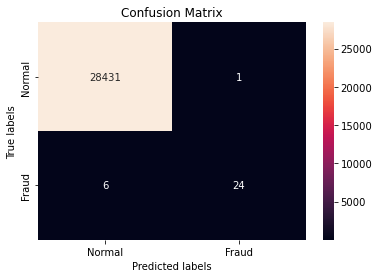

In [122]:


from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import KNeighborsClassifier

# cov = EllipticEnvelope(support_fraction = 0.994, contamination = 0.001)

# ground_truth = np.ones(len(val_x), dtype=int)
# y_pred = cov.fit_predict(encoder_all.predict(val_x))


knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn_model.fit(val_x,val_y)

# %%time
knn_predicted= knn_model.predict(encoder_all.predict(val_x))

conf_matrix = metrics.confusion_matrix(val_y,knn_predicted)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

In [91]:
knn_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [93]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
val_pred = get_pred_label(knn_predicted)
val_score = f1_score(val_y, knn_predicted, average='macro')

print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, knn_predicted))

Validation F1 Score : [0.9209734995691702]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.89      0.80      0.84        30

    accuracy                           1.00     28462
   macro avg       0.94      0.90      0.92     28462
weighted avg       1.00      1.00      1.00     28462



In [99]:
enc_all = encoder_all.predict(test_x)


In [107]:
sample = pd.read_csv("./Data/sample_submission.csv")

In [108]:
sample

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1
...,...,...
142498,0x4587f,1
142499,0x45880,1
142500,0x45884,1
142501,0x45885,1


In [101]:
sample['Class'] = 0

In [ ]:
enc_all,val_y)


In [111]:
knn_model.fit(enc_all,sample['Class'])


ValueError: Found input variables with inconsistent numbers of samples: [113378, 142503]